# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [157]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [158]:
import os

In [159]:
os.getcwd()

'/data/ephemeral/home/upstage-ml-regression-3/eonseon'

In [160]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/data/ephemeral/home/train.csv'
test_path  = '/data/ephemeral/home/test.csv'
dt = pd.read_csv(train_path)


In [161]:
dt_test = pd.read_csv(test_path)

In [162]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [163]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1118822 non-null  object 
 1   Î≤àÏßÄ                      1118597 non-null  object 
 2   Î≥∏Î≤à                      1118747 non-null  float64
 3   Î∂ÄÎ≤à                      1118747 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1116696 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1118822 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1118822 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1118822 non-null  int64  
 8   Ï∏µ                       1118822 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1118822 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1118822 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 5983 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [164]:
dt['Ï¢åÌëúX'].describe()

count    249152.000000
mean        126.995228
std           0.091045
min         126.798318
25%         126.913157
50%         127.014971
75%         127.059590
max         127.179998
Name: Ï¢åÌëúX, dtype: float64

In [165]:
dt.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)',
       'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
       'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
       'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ',
       'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏

In [166]:
dt[['ÎèÑÎ°úÎ™Ö','Ï¢åÌëúX']]

ÎèÑÎ°úÎ™Ö         Ï¢åÌëúX
0             Ïñ∏Ï£ºÎ°ú 3  127.057210
1             Ïñ∏Ï£ºÎ°ú 3  127.057210
2             Ïñ∏Ï£ºÎ°ú 3  127.057210
3             Ïñ∏Ï£ºÎ°ú 3  127.057210
4             Ïñ∏Ï£ºÎ°ú 3  127.057210
...             ...         ...
1118817  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638
1118818  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638
1118819  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638
1118820  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638
1118821    ÏÑúÏï†Î°ú1Í∏∏ 34  127.000071

[1118822 rows x 2 columns]

In [167]:
df_bus = pd.read_csv("/data/ephemeral/home/bus_feature.csv")
df_metro = pd.read_csv("/data/ephemeral/home/subway_feature.csv")

In [168]:
df_bus

ÎÖ∏Îìú ID  Ï†ïÎ•òÏÜåÎ≤àÌò∏           Ï†ïÎ•òÏÜåÎ™Ö         XÏ¢åÌëú        YÏ¢åÌëú Ï†ïÎ•òÏÜå ÌÉÄÏûÖ
0      100000001   1001        Ï¢ÖÎ°ú2Í∞ÄÏÇ¨Í±∞Î¶¨  126.987752  37.569808   Ï§ëÏïôÏ∞®Î°ú
1      100000002   1002    Ï∞ΩÍ≤ΩÍ∂Å.ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê  126.996566  37.579183   Ï§ëÏïôÏ∞®Î°ú
2      100000003   1003      Î™ÖÎ•ú3Í∞Ä.ÏÑ±ÎåÄÏûÖÍµ¨  126.998251  37.582581   Ï§ëÏïôÏ∞®Î°ú
3      100000004   1004       Ï¢ÖÎ°ú2Í∞Ä.ÏÇºÏùºÍµê  126.987613  37.568579   Ï§ëÏïôÏ∞®Î°ú
4      100000005   1005  ÌòúÌôîÎèôÎ°úÌÑ∞Î¶¨.Ïó¨Ïö¥ÌòïÌôúÎèôÌÑ∞  127.001744  37.586243   Ï§ëÏïôÏ∞®Î°ú
...          ...    ...            ...         ...        ...    ...
12579  124000334  25995          Ïö∞ÏÑ±ÏïÑÌååÌä∏  127.139338  37.550386   ÏùºÎ∞òÏ∞®Î°ú
12580  124000333  25996          Ïö∞ÏÑ±ÏïÑÌååÌä∏  127.140046  37.550643   ÏùºÎ∞òÏ∞®Î°ú
12581  124000332  25997           Ï°∞ÏùºÏïΩÍµ≠  127.123596  37.533630   ÏùºÎ∞òÏ∞®Î°ú
12582  124000331  25998           ÏÑ±ÎÇ¥ÏãúÏû•  127.125497  37.536155   ÏùºÎ∞òÏ∞®Î°ú
12583  124000330  25999    Ï≤úÌò∏Ïö∞Ï≤¥Íµ≠.Î°úÎç∞Ïò§Í±∞Î¶¨  127.127337  37.540343   ÏùºÎ∞òÏ∞®Î°ú

[12584 rows x 6 columns]

In [169]:
df_metro

Ïó≠ÏÇ¨_ID   Ïó≠ÏÇ¨Î™Ö      Ìò∏ÏÑ†         ÏúÑÎèÑ          Í≤ΩÎèÑ
0     9996    ÎØ∏ÏÇ¨     5Ìò∏ÏÑ†  37.560927  127.193877
1     9995    Í∞ïÏùº     5Ìò∏ÏÑ†  37.557490  127.175930
2     4929  ÍπÄÌè¨Í≥µÌï≠  ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏  37.562360  126.801868
3     4928    Í≥†Ï¥å  ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏  37.601243  126.770345
4     4927    ÌíçÎ¨¥  ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏  37.612488  126.732387
..     ...   ...     ...        ...         ...
763    154  Ï¢ÖÎ°ú5Í∞Ä     1Ìò∏ÏÑ†  37.570926  127.001849
764    153  Ï¢ÖÎ°ú3Í∞Ä     1Ìò∏ÏÑ†  37.570406  126.991847
765    152    Ï¢ÖÍ∞Å     1Ìò∏ÏÑ†  37.570161  126.982923
766    151    ÏãúÏ≤≠     1Ìò∏ÏÑ†  37.565715  126.977088
767    150   ÏÑúÏö∏Ïó≠     1Ìò∏ÏÑ†  37.556228  126.972135

[768 rows x 5 columns]

### Í≥µÍ≥µÏ£ºÌÉùÏóê ÎåÄÌïú Í∞ÄÏ†ï Ï≤¥ÌÅ¨
- ÏûëÏóÖÏûê : Ï†ïÌòúÏú§

In [170]:
dt.shape

(1118822, 52)

In [171]:
k_rel_cols = ['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)',
    'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
    'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
    'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
    'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ',
    'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê']

In [172]:
dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].isnull().sum()

869608

In [173]:
dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].notnull().sum()

249214

In [174]:
dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].isnull().sum() + dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].notnull().sum()

1118822

In [175]:
dt_k_area_isnull = dt[dt['k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)'].isnull()][k_rel_cols]

In [176]:
dt_k_area_isnull

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-Ï†ÑÌôîÎ≤àÌò∏ k-Ìå©Ïä§Î≤àÌò∏  Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù  \
975                    NaN    NaN    NaN         NaN          NaN    NaN   
976                    NaN    NaN    NaN         NaN          NaN    NaN   
977                    NaN    NaN    NaN         NaN          NaN    NaN   
978                    NaN    NaN    NaN         NaN          NaN    NaN   
979                    NaN    NaN    NaN         NaN          NaN    NaN   
...                    ...    ...    ...         ...          ...    ...   
1118203                NaN    NaN    NaN         NaN          NaN    NaN   
1118204                NaN    NaN    NaN         NaN          NaN    NaN   
1118205                NaN    NaN    NaN         NaN          NaN    NaN   
1118206                NaN    NaN    NaN         NaN          NaN    NaN   
1118207                NaN    NaN    NaN         NaN          NaN    NaN   

        k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  ... k-Ïó∞Î©¥Ï†Å k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
975        NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
976        NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
977        NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
978        NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
979        NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
...        ...    ...     ...      ...  ...   ...      ...       ...   
1118203    NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
1118204    NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
1118205    NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
1118206    NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   
1118207    NaN    NaN     NaN      NaN  ...   NaN      NaN       NaN   

         k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º  \
975                     NaN                     NaN           NaN       NaN   
976                     NaN                     NaN           NaN       NaN   
977                     NaN                     NaN           NaN       NaN   
978                     NaN                     NaN           NaN       NaN   
979                     NaN                     NaN           NaN       NaN   
...                     ...                     ...           ...       ...   
1118203                 NaN                     NaN           NaN       NaN   
1118204                 NaN                     NaN           NaN       NaN   
1118205                 NaN                     NaN           NaN       NaN   
1118206                 NaN                     NaN           NaN       NaN   
1118207                 NaN                     NaN           NaN       NaN   

         k-ÌôàÌéòÏù¥ÏßÄ  k-Îì±Î°ùÏùºÏûê  k-ÏàòÏ†ïÏùºÏûê  
975         NaN     NaN     NaN  
976         NaN     NaN     NaN  
977         NaN     NaN     NaN  
978         NaN     NaN     NaN  
979         NaN     NaN     NaN  
...         ...     ...     ...  
1118203     NaN     NaN     NaN  
1118204     NaN     NaN     NaN  
1118205     NaN     NaN     NaN  
1118206     NaN     NaN     NaN  
1118207     NaN     NaN     NaN  

[869608 rows x 23 columns]

In [177]:
dt_k_area_isnull.notnull().sum()

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         0
k-Ï†ÑÌôîÎ≤àÌò∏                    45
k-Ìå©Ïä§Î≤àÌò∏                    45
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                 0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              45
k-Í¥ÄÎ¶¨Î∞©Ïãù                    45
k-Î≥µÎèÑÏú†Ìòï                    45
k-ÎÇúÎ∞©Î∞©Ïãù                    45
k-Ï†ÑÏ≤¥ÎèôÏàò                    45
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   45
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                45
k-ÏãúÌñâÏÇ¨                      0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             45
k-Ïó∞Î©¥Ï†Å                     45
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                   0
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                 45
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)         0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)     0
k-85„é°~135„é°Ïù¥Ìïò               0
k-135„é°Ï¥àÍ≥º                   0
k-ÌôàÌéòÏù¥ÏßÄ                     0
k-Îì±Î°ùÏùºÏûê                     0
k-ÏàòÏ†ïÏùºÏûê                     0
dtype: int64

In [178]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].notnull().sum()

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        0
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                0
k-ÏãúÌñâÏÇ¨                     0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0
k-85„é°~135„é°Ïù¥Ìïò              0
k-135„é°Ï¥àÍ≥º                  0
k-ÌôàÌéòÏù¥ÏßÄ                    0
k-Îì±Î°ùÏùºÏûê                    0
k-ÏàòÏ†ïÏùºÏûê                    0
dtype: int64

In [179]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() != 0].notnull().sum()

k-Ï†ÑÌôîÎ≤àÌò∏           45
k-Ìå©Ïä§Î≤àÌò∏           45
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)     45
k-Í¥ÄÎ¶¨Î∞©Ïãù           45
k-Î≥µÎèÑÏú†Ìòï           45
k-ÎÇúÎ∞©Î∞©Ïãù           45
k-Ï†ÑÏ≤¥ÎèôÏàò           45
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò          45
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)       45
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    45
k-Ïó∞Î©¥Ï†Å            45
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å        45
dtype: int64

In [180]:
dt_k_area_notnull = dt[dt['k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)'].notnull()][k_rel_cols]

In [181]:
dt_k_area_notnull.isnull().sum()

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)          1083
k-Ï†ÑÌôîÎ≤àÌò∏                       711
k-Ìå©Ïä§Î≤àÌò∏                      3179
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                180632
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)                   0
k-Í¥ÄÎ¶¨Î∞©Ïãù                         0
k-Î≥µÎèÑÏú†Ìòï                       327
k-ÎÇúÎ∞©Î∞©Ïãù                         0
k-Ï†ÑÏ≤¥ÎèôÏàò                      1067
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                        0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                  1495
k-ÏãúÌñâÏÇ¨                       1646
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº                133
k-Ïó∞Î©¥Ï†Å                          0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                       0
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                      0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)             0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)         0
k-85„é°~135„é°Ïù¥Ìïò                   0
k-135„é°Ï¥àÍ≥º                  248887
k-ÌôàÌéòÏù¥ÏßÄ                    136039
k-Îì±Î°ùÏùºÏûê                    238224
k-ÏàòÏ†ïÏùºÏ

In [182]:
dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0].isnull().sum()

k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              0
k-Í¥ÄÎ¶¨Î∞©Ïãù                    0
k-ÎÇúÎ∞©Î∞©Ïãù                    0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0
k-Ïó∞Î©¥Ï†Å                     0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  0
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                 0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0
k-85„é°~135„é°Ïù¥Ìïò              0
k-ÏàòÏ†ïÏùºÏûê                    0
dtype: int64

In [183]:
dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() != 0].isnull().sum()

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1083
k-Ï†ÑÌôîÎ≤àÌò∏                   711
k-Ìå©Ïä§Î≤àÌò∏                  3179
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob            180632
k-Î≥µÎèÑÏú†Ìòï                   327
k-Ï†ÑÏ≤¥ÎèôÏàò                  1067
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              1495
k-ÏãúÌñâÏÇ¨                   1646
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº            133
k-135„é°Ï¥àÍ≥º              248887
k-ÌôàÌéòÏù¥ÏßÄ                136039
k-Îì±Î°ùÏùºÏûê                238224
dtype: int64

In [184]:
(dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() != 0].isnull().sum()/dt_k_area_notnull.shape[0]).round(4)

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)    0.0043
k-Ï†ÑÌôîÎ≤àÌò∏                0.0029
k-Ìå©Ïä§Î≤àÌò∏                0.0128
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob            0.7248
k-Î≥µÎèÑÏú†Ìòï                0.0013
k-Ï†ÑÏ≤¥ÎèôÏàò                0.0043
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)            0.0060
k-ÏãúÌñâÏÇ¨                 0.0066
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº         0.0005
k-135„é°Ï¥àÍ≥º              0.9987
k-ÌôàÌéòÏù¥ÏßÄ                0.5459
k-Îì±Î°ùÏùºÏûê                0.9559
dtype: float64

In [185]:
cols_to_check = dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns.tolist()

In [186]:
dt_k_area_notnull[cols_to_check].isnull().sum()

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)          1083
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                180632
k-ÏãúÌñâÏÇ¨                       1646
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                       0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)             0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)         0
k-85„é°~135„é°Ïù¥Ìïò                   0
k-135„é°Ï¥àÍ≥º                  248887
k-ÌôàÌéòÏù¥ÏßÄ                    136039
k-Îì±Î°ùÏùºÏûê                    238224
k-ÏàòÏ†ïÏùºÏûê                         0
dtype: int64

In [187]:
dt_k_area_notnull.shape

(249214, 23)

In [188]:
dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns

Index(['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏãúÌñâÏÇ¨', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ', 'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê'],
      dtype='object')

In [189]:
dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0].columns

Index(['k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
       'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê'],
      dtype='object')

In [190]:
cols_to_use = []
for col in dt_k_area_isnull.loc[:, dt_k_area_isnull.notnull().sum() == 0].columns.tolist():
    if col in dt_k_area_notnull.loc[:, dt_k_area_notnull.isnull().sum() == 0].columns.tolist():
        cols_to_use.append(col)

In [191]:
cols_to_use

['k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
 'k-85„é°~135„é°Ïù¥Ìïò',
 'k-ÏàòÏ†ïÏùºÏûê']

In [192]:
cols_to_drop = []

for col in k_rel_cols:
    if col not in cols_to_use:
        cols_to_drop.append(col)

In [193]:
cols_to_drop

['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)',
 'k-Ï†ÑÌôîÎ≤àÌò∏',
 'k-Ìå©Ïä§Î≤àÌò∏',
 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob',
 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
 'k-Î≥µÎèÑÏú†Ìòï',
 'k-ÎÇúÎ∞©Î∞©Ïãù',
 'k-Ï†ÑÏ≤¥ÎèôÏàò',
 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
 'k-ÏãúÌñâÏÇ¨',
 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
 'k-Ïó∞Î©¥Ï†Å',
 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
 'k-135„é°Ï¥àÍ≥º',
 'k-ÌôàÌéòÏù¥ÏßÄ',
 'k-Îì±Î°ùÏùºÏûê']

In [194]:
dt['is_public'] = dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].notnull()

In [195]:
dt['is_public'].value_counts()

False    869608
True     249214
Name: is_public, dtype: int64

In [196]:
dt = dt.drop(columns = cols_to_drop)

### Îì±Í∏∞Ï†ïÎ≥¥ Î∞è xÏ¢åÌëú yÏ¢åÌëú Ï≤¥ÌÅ¨

In [197]:
basic_cols = ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'target']

In [198]:
cols_except_k = []
for col in dt.columns.tolist():
    if (col not in k_rel_cols) & (col not in basic_cols):
        cols_except_k.append(col)  

In [199]:
cols_except_k

['Ï†ÑÏö©Î©¥Ï†Å(„é°)',
 'Í≥ÑÏïΩÎÖÑÏõî',
 'Í≥ÑÏïΩÏùº',
 'Ï∏µ',
 'Í±¥Ï∂ïÎÖÑÎèÑ',
 'ÎèÑÎ°úÎ™Ö',
 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº',
 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê',
 'Í±∞ÎûòÏú†Ìòï',
 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ',
 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
 'Í±¥Ï∂ïÎ©¥Ï†Å',
 'Ï£ºÏ∞®ÎåÄÏàò',
 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
 'Îã®ÏßÄÏäπÏù∏Ïùº',
 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä',
 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
 'Ï¢åÌëúX',
 'Ï¢åÌëúY',
 'Îã®ÏßÄÏã†Ï≤≠Ïùº',
 'is_public']

In [200]:
dt[cols_except_k].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Ï†ÑÏö©Î©¥Ï†Å(„é°)              1118822 non-null  float64
 1   Í≥ÑÏïΩÎÖÑÏõî                 1118822 non-null  int64  
 2   Í≥ÑÏïΩÏùº                  1118822 non-null  int64  
 3   Ï∏µ                    1118822 non-null  int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ                 1118822 non-null  int64  
 5   ÎèÑÎ°úÎ™Ö                  1118822 non-null  object 
 6   Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº              5983 non-null     float64
 7   Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê               1118822 non-null  object 
 8   Í±∞ÎûòÏú†Ìòï                 1118822 non-null  object 
 9   Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ               1118822 non-null  object 
 10  Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏             205518 non-null   object 
 11  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú              247834 non-null   object 
 12  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï             2

In [201]:
dt[cols_except_k].isnull().sum()

Ï†ÑÏö©Î©¥Ï†Å(„é°)                      0
Í≥ÑÏïΩÎÖÑÏõî                         0
Í≥ÑÏïΩÏùº                          0
Ï∏µ                            0
Í±¥Ï∂ïÎÖÑÎèÑ                         0
ÎèÑÎ°úÎ™Ö                          0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                1112839
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                       0
Í±∞ÎûòÏú†Ìòï                         0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                       0
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏                913304
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 870988
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                878747
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 871178
Í±¥Ï∂ïÎ©¥Ï†Å                    869714
Ï£ºÏ∞®ÎåÄÏàò                    869714
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4     869563
Îã®ÏßÄÏäπÏù∏Ïùº                   870286
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                  869563
Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú                 869563
Ï¢åÌëúX                     869670
Ï¢åÌëúY                     869670
Îã®ÏßÄÏã†Ï≤≠Ïùº                   869625
is_public                    0
dtype: int64

In [202]:
dt[cols_except_k].loc[:, dt[cols_except_k].isnull().sum() == 0].isnull().sum()

Ï†ÑÏö©Î©¥Ï†Å(„é°)      0
Í≥ÑÏïΩÎÖÑÏõî         0
Í≥ÑÏïΩÏùº          0
Ï∏µ            0
Í±¥Ï∂ïÎÖÑÎèÑ         0
ÎèÑÎ°úÎ™Ö          0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê       0
Í±∞ÎûòÏú†Ìòï         0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ       0
is_public    0
dtype: int64

In [203]:
dt[cols_except_k].loc[:, dt[cols_except_k].isnull().sum() == 0].isnull().sum().index.tolist()

['Ï†ÑÏö©Î©¥Ï†Å(„é°)',
 'Í≥ÑÏïΩÎÖÑÏõî',
 'Í≥ÑÏïΩÏùº',
 'Ï∏µ',
 'Í±¥Ï∂ïÎÖÑÎèÑ',
 'ÎèÑÎ°úÎ™Ö',
 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê',
 'Í±∞ÎûòÏú†Ìòï',
 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ',
 'is_public']

In [204]:
private_apt = dt[dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].isnull()]

In [205]:
public_apt = dt[dt["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].notnull()]

In [206]:
private_apt[['ÎèÑÎ°úÎ™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY']]

ÎèÑÎ°úÎ™Ö  Ï¢åÌëúX  Ï¢åÌëúY
975           ÏÇºÏÑ±Î°ú 14  NaN  NaN
976           ÏÇºÏÑ±Î°ú 14  NaN  NaN
977           ÏÇºÏÑ±Î°ú 14  NaN  NaN
978           ÏÇºÏÑ±Î°ú 14  NaN  NaN
979           ÏÇºÏÑ±Î°ú 14  NaN  NaN
...              ...  ...  ...
1118203   ÎèôÏùºÎ°ú144Í∏∏ 74  NaN  NaN
1118204  Î¥âÌôîÏÇ∞Î°ú27Í∞ÄÍ∏∏ 23  NaN  NaN
1118205  Î¥âÌôîÏÇ∞Î°ú27Í∞ÄÍ∏∏ 23  NaN  NaN
1118206  Î¥âÌôîÏÇ∞Î°ú27Í∞ÄÍ∏∏ 23  NaN  NaN
1118207  Î¥âÌôîÏÇ∞Î°ú27Í∞ÄÍ∏∏ 19  NaN  NaN

[869608 rows x 3 columns]

In [207]:
public_apt[['ÎèÑÎ°úÎ™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY']]

ÎèÑÎ°úÎ™Ö         Ï¢åÌëúX        Ï¢åÌëúY
0             Ïñ∏Ï£ºÎ°ú 3  127.057210  37.476763
1             Ïñ∏Ï£ºÎ°ú 3  127.057210  37.476763
2             Ïñ∏Ï£ºÎ°ú 3  127.057210  37.476763
3             Ïñ∏Ï£ºÎ°ú 3  127.057210  37.476763
4             Ïñ∏Ï£ºÎ°ú 3  127.057210  37.476763
...             ...         ...        ...
1118817  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638  37.612962
1118818  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638  37.612962
1118819  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638  37.612962
1118820  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  126.905638  37.612962
1118821    ÏÑúÏï†Î°ú1Í∏∏ 34  127.000071  37.560706

[249214 rows x 3 columns]

In [208]:
private_apt[['ÎèÑÎ°úÎ™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'ÏïÑÌååÌä∏Î™Ö']].isnull().sum()

ÎèÑÎ°úÎ™Ö          0
Ï¢åÌëúX     869608
Ï¢åÌëúY     869608
ÏïÑÌååÌä∏Î™Ö      2126
dtype: int64

In [209]:
public_apt[['ÎèÑÎ°úÎ™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'ÏïÑÌååÌä∏Î™Ö']].isnull().sum()

ÎèÑÎ°úÎ™Ö      0
Ï¢åÌëúX     62
Ï¢åÌëúY     62
ÏïÑÌååÌä∏Î™Ö     0
dtype: int64

In [210]:
private_apt['ÏïÑÌååÌä∏Î™Ö'].nunique()

5856

In [211]:
private_apt['ÎèÑÎ°úÎ™Ö'].nunique()

8440

In [212]:
public_apt['ÏïÑÌååÌä∏Î™Ö'].nunique()

735

In [213]:
public_apt['ÎèÑÎ°úÎ™Ö'].nunique()

833

### Î∂ÑÏÑù

In [214]:
dt.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY',
       'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_public'],
      dtype='object')

In [215]:
dt['Íµ¨'] = dt['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])

In [216]:
dt.groupby("Íµ¨")["target"].mean().sort_values(ascending=False)

Íµ¨
Í∞ïÎÇ®Íµ¨     114847.461503
ÏÑúÏ¥àÍµ¨     113608.653390
Ïö©ÏÇ∞Íµ¨     105876.961900
ÏÜ°ÌååÍµ¨      83868.032920
ÏÑ±ÎèôÍµ¨      68924.389400
Í¥ëÏßÑÍµ¨      67158.379293
ÎßàÌè¨Íµ¨      64445.226137
Ï§ëÍµ¨       62084.985733
ÎèôÏûëÍµ¨      60936.451058
ÏñëÏ≤úÍµ¨      59042.132927
Ï¢ÖÎ°úÍµ¨      57674.032963
ÏòÅÎì±Ìè¨Íµ¨     56137.342464
Í∞ïÎèôÍµ¨      54402.872801
ÏÑúÎåÄÎ¨∏Íµ¨     49082.573688
ÎèôÎåÄÎ¨∏Íµ¨     45194.761822
ÏÑ±Î∂ÅÍµ¨      45117.779038
Í∞ïÏÑúÍµ¨      44215.453701
ÏùÄÌèâÍµ¨      43721.691848
Í¥ÄÏïÖÍµ¨      41954.133039
Íµ¨Î°úÍµ¨      38605.012447
Í∞ïÎ∂ÅÍµ¨      38316.975201
Ï§ëÎûëÍµ¨      35195.762819
ÎÖ∏ÏõêÍµ¨      33870.444730
Í∏àÏ≤úÍµ¨      33709.248647
ÎèÑÎ¥âÍµ¨      31924.613711
Name: target, dtype: float64

In [217]:
mean_val_by_gu = dt.groupby("Íµ¨")["target"].mean().sort_values(ascending=False)

In [218]:
mean_val_by_gu.to_csv("Íµ¨Î≥ÑÌèâÍ∑†Í∞Ä.csv")

In [219]:
dt.groupby("Íµ¨")["target"].std().sort_values(ascending=False)

Íµ¨
Ïö©ÏÇ∞Íµ¨     90148.440633
Í∞ïÎÇ®Íµ¨     78572.045476
ÏÑúÏ¥àÍµ¨     74485.257724
ÏÜ°ÌååÍµ¨     47626.592378
ÏÑ±ÎèôÍµ¨     45378.104410
Ï¢ÖÎ°úÍµ¨     41036.478979
ÏñëÏ≤úÍµ¨     37811.589121
ÏòÅÎì±Ìè¨Íµ¨    37610.116967
Í¥ëÏßÑÍµ¨     35952.014115
Ï§ëÍµ¨      35533.593585
ÎßàÌè¨Íµ¨     35529.508459
ÎèôÏûëÍµ¨     29448.545826
Í∞ïÎèôÍµ¨     28152.234720
ÏÑúÎåÄÎ¨∏Íµ¨    27368.356400
Í∞ïÏÑúÍµ¨     23947.649811
ÎèôÎåÄÎ¨∏Íµ¨    22755.297441
ÏùÄÌèâÍµ¨     21368.819979
Íµ¨Î°úÍµ¨     19893.188082
ÏÑ±Î∂ÅÍµ¨     19874.793126
Í¥ÄÏïÖÍµ¨     18337.719985
ÎÖ∏ÏõêÍµ¨     17460.680792
Í∏àÏ≤úÍµ¨     16949.254267
Ï§ëÎûëÍµ¨     16822.560420
Í∞ïÎ∂ÅÍµ¨     16429.208005
ÎèÑÎ¥âÍµ¨     15887.709700
Name: target, dtype: float64

In [220]:
std_val_by_gu = dt.groupby("Íµ¨")["target"].std().sort_values(ascending=False)

Text(0.5, 1.0, 'Íµ¨Î≥Ñ ÌèâÍ∑†Í∞Ä')

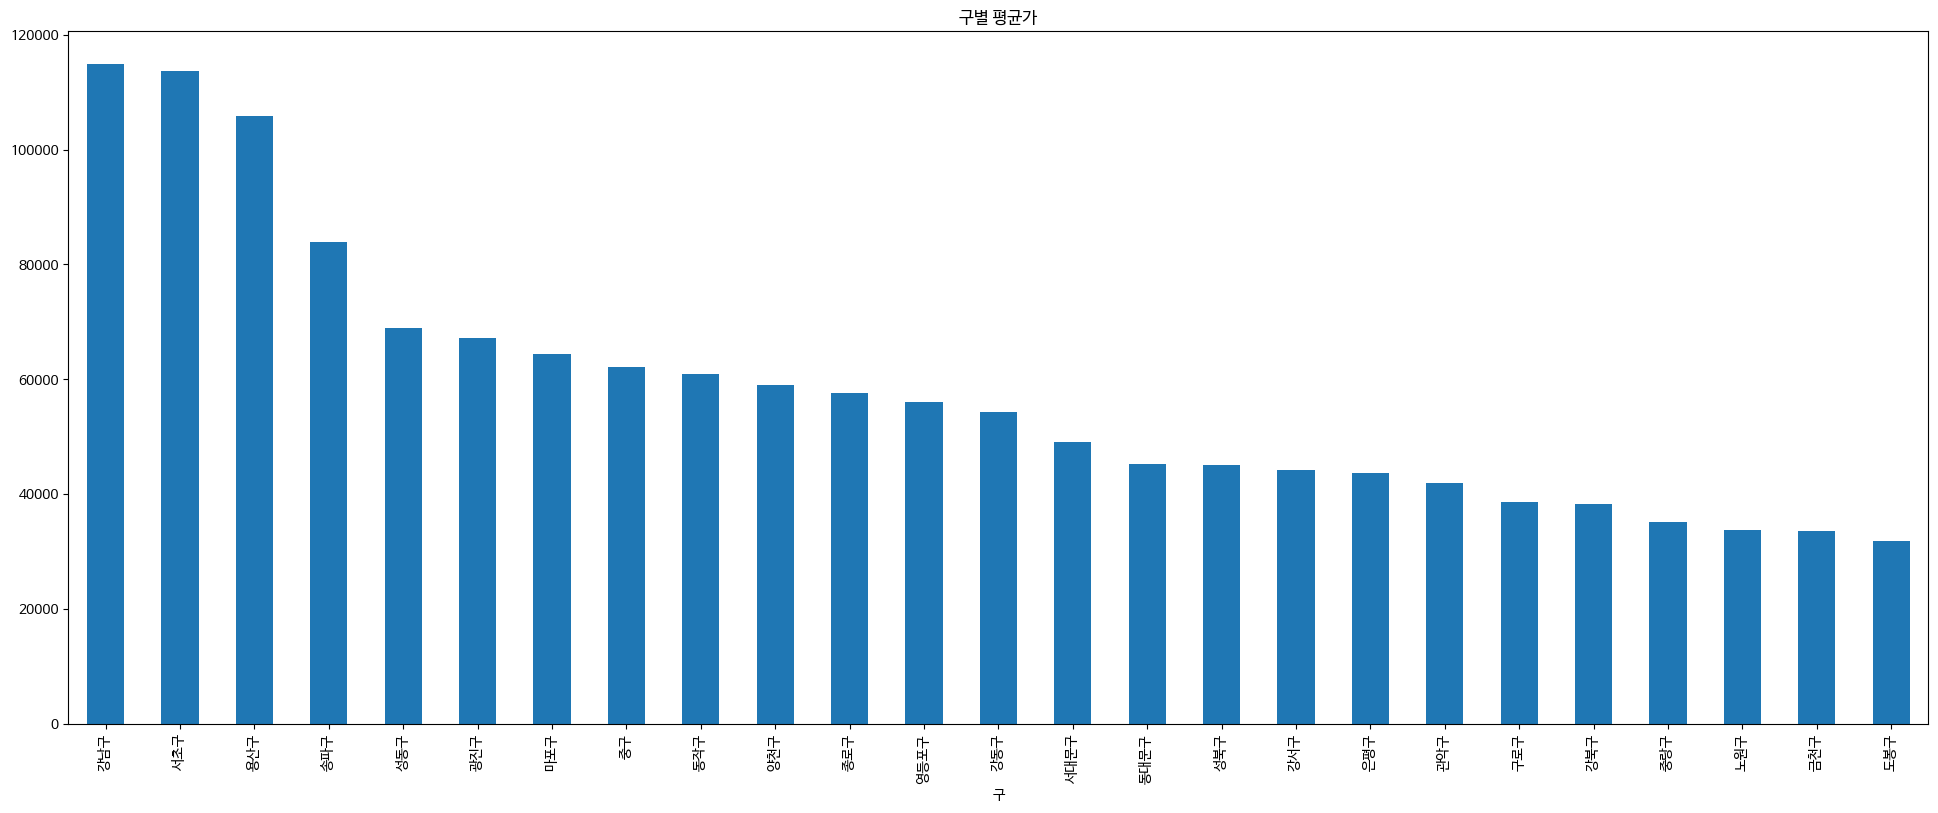

In [221]:
plt.figure(figsize=(24, 9))
mean_val_by_gu.plot.bar()
plt.title("Íµ¨Î≥Ñ ÌèâÍ∑†Í∞Ä")

In [222]:
list_of_gu = dt["Íµ¨"].unique().tolist()

In [223]:
len(list_of_gu)

25

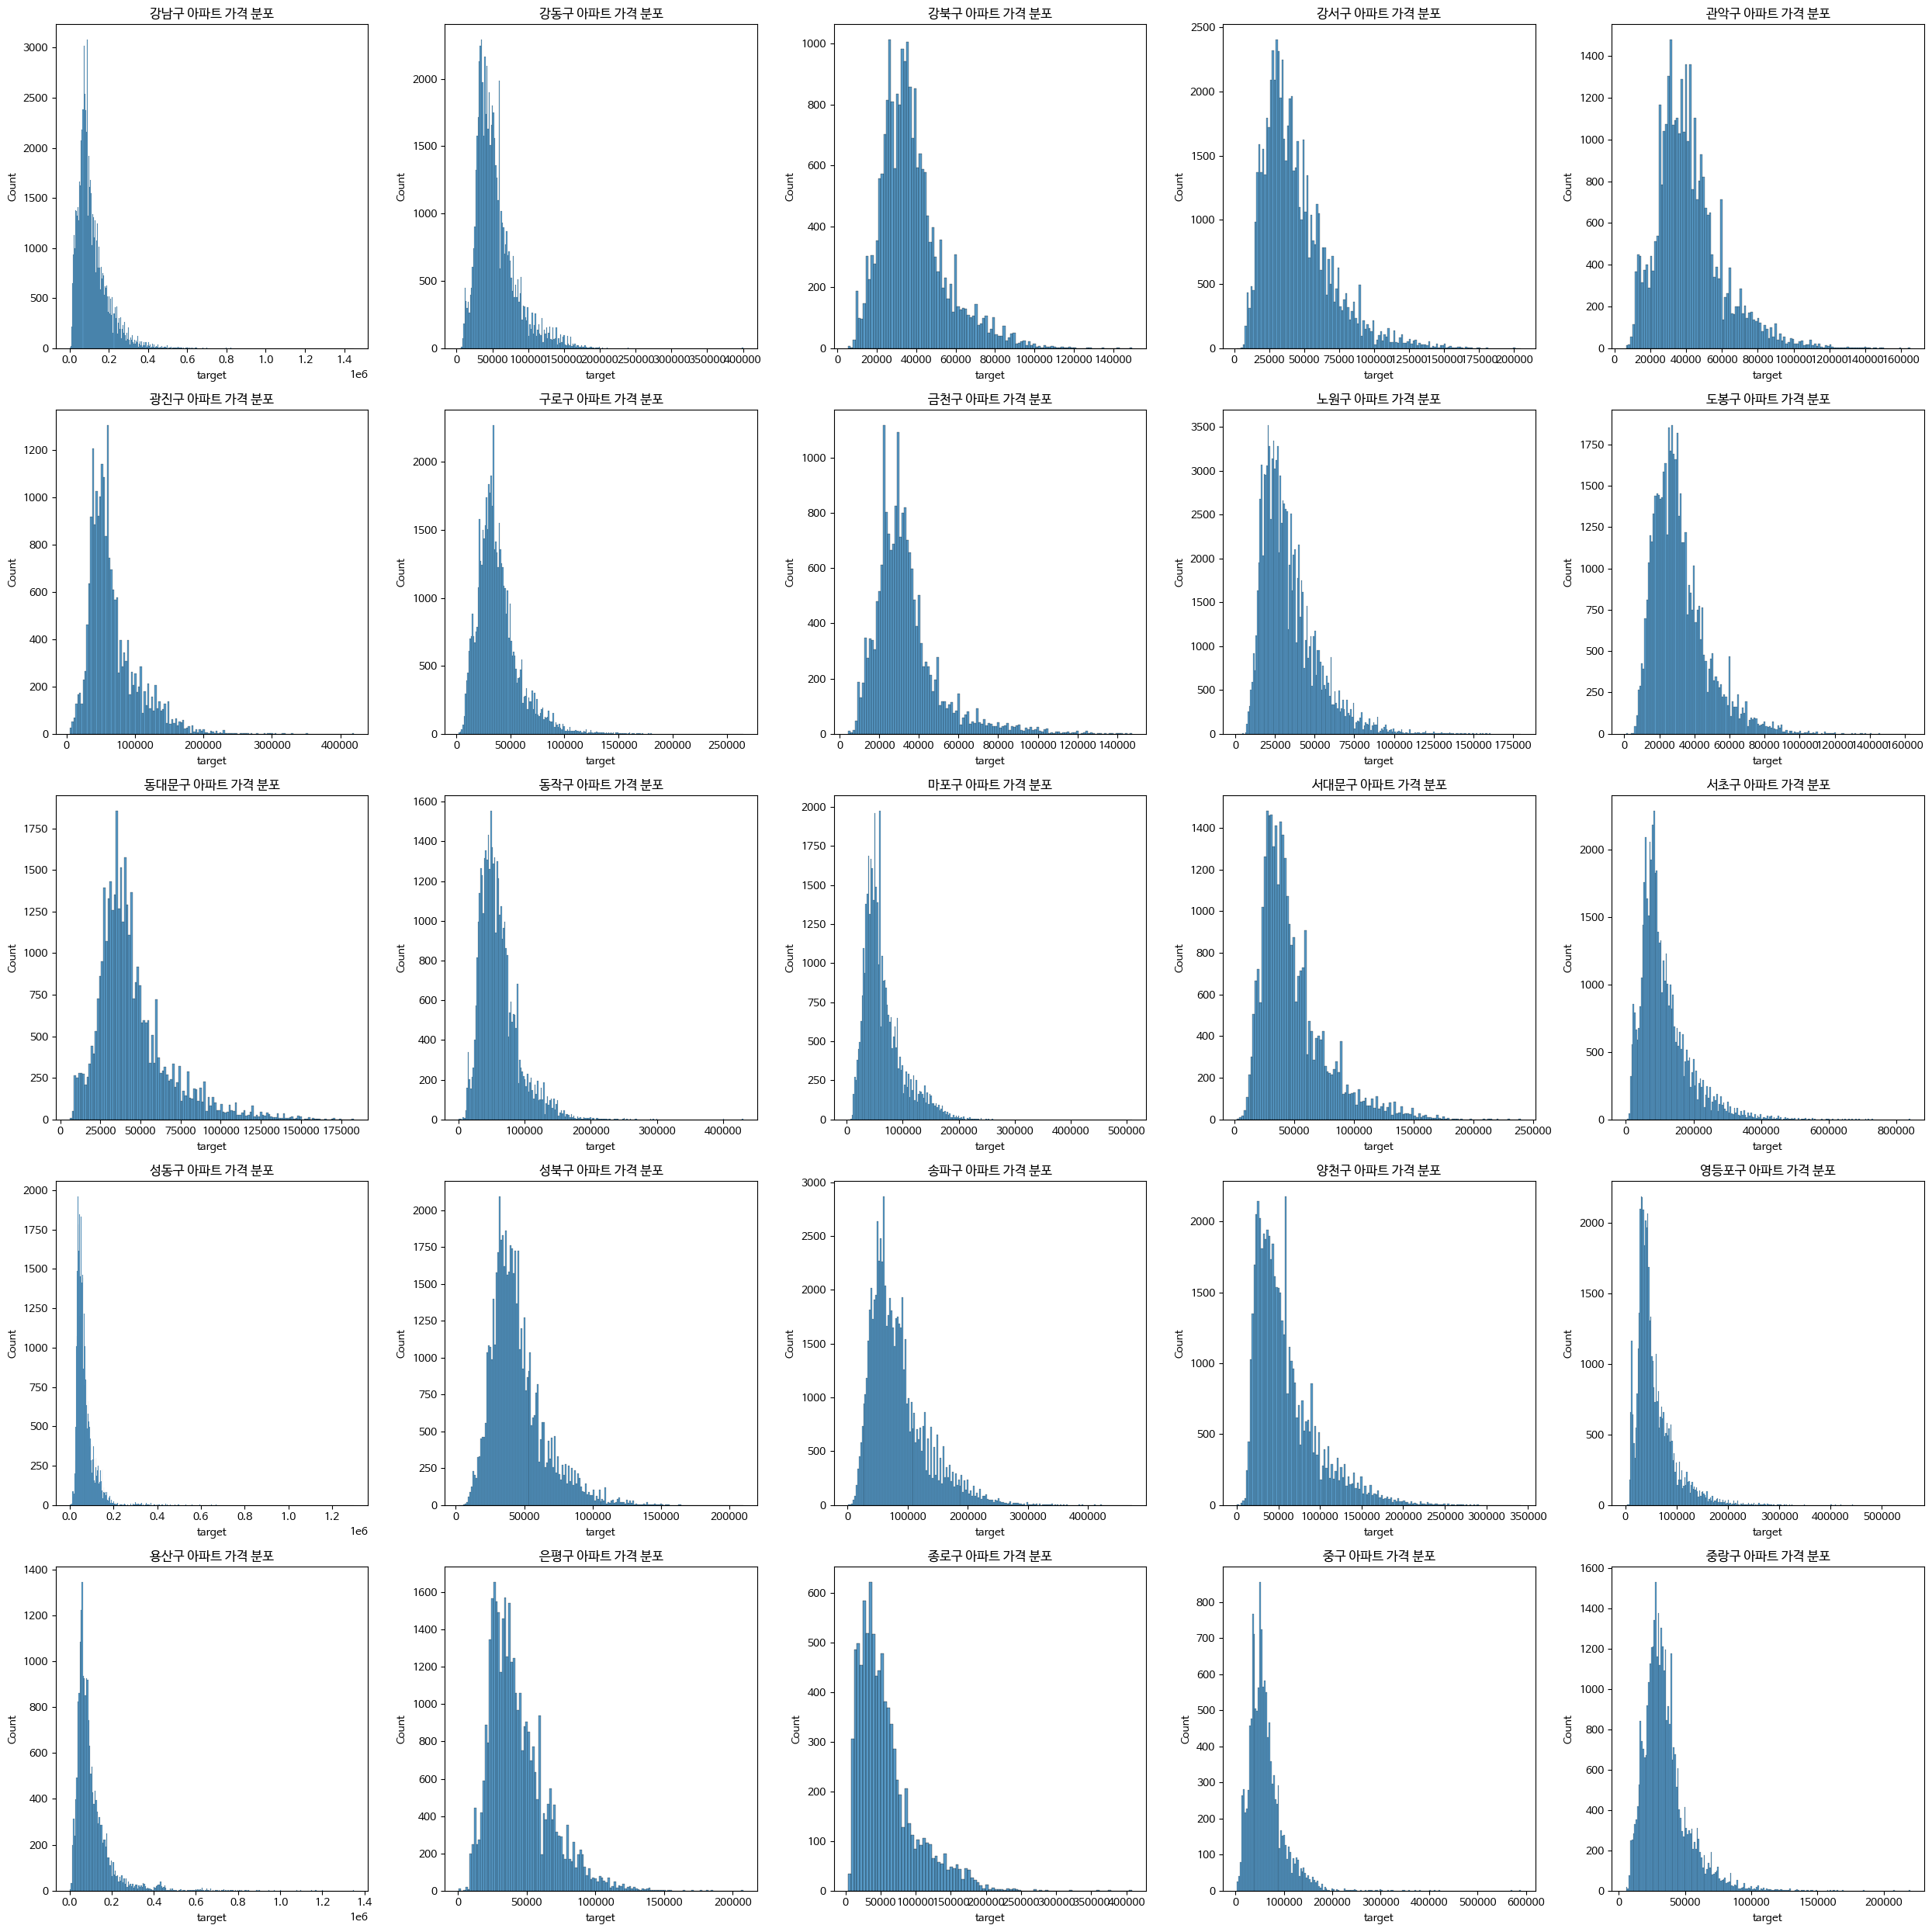

In [224]:
rows = 5
cols = 5

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (25,25))

for i, district in enumerate(list_of_gu):
    row = i // cols
    col = i % cols
    sns.histplot(dt[dt["Íµ¨"] == district]['target'], ax=axs[row, col])
    axs[row, col].set_title(f"{district} ÏïÑÌååÌä∏ Í∞ÄÍ≤© Î∂ÑÌè¨")
    
plt.tight_layout()
plt.show()


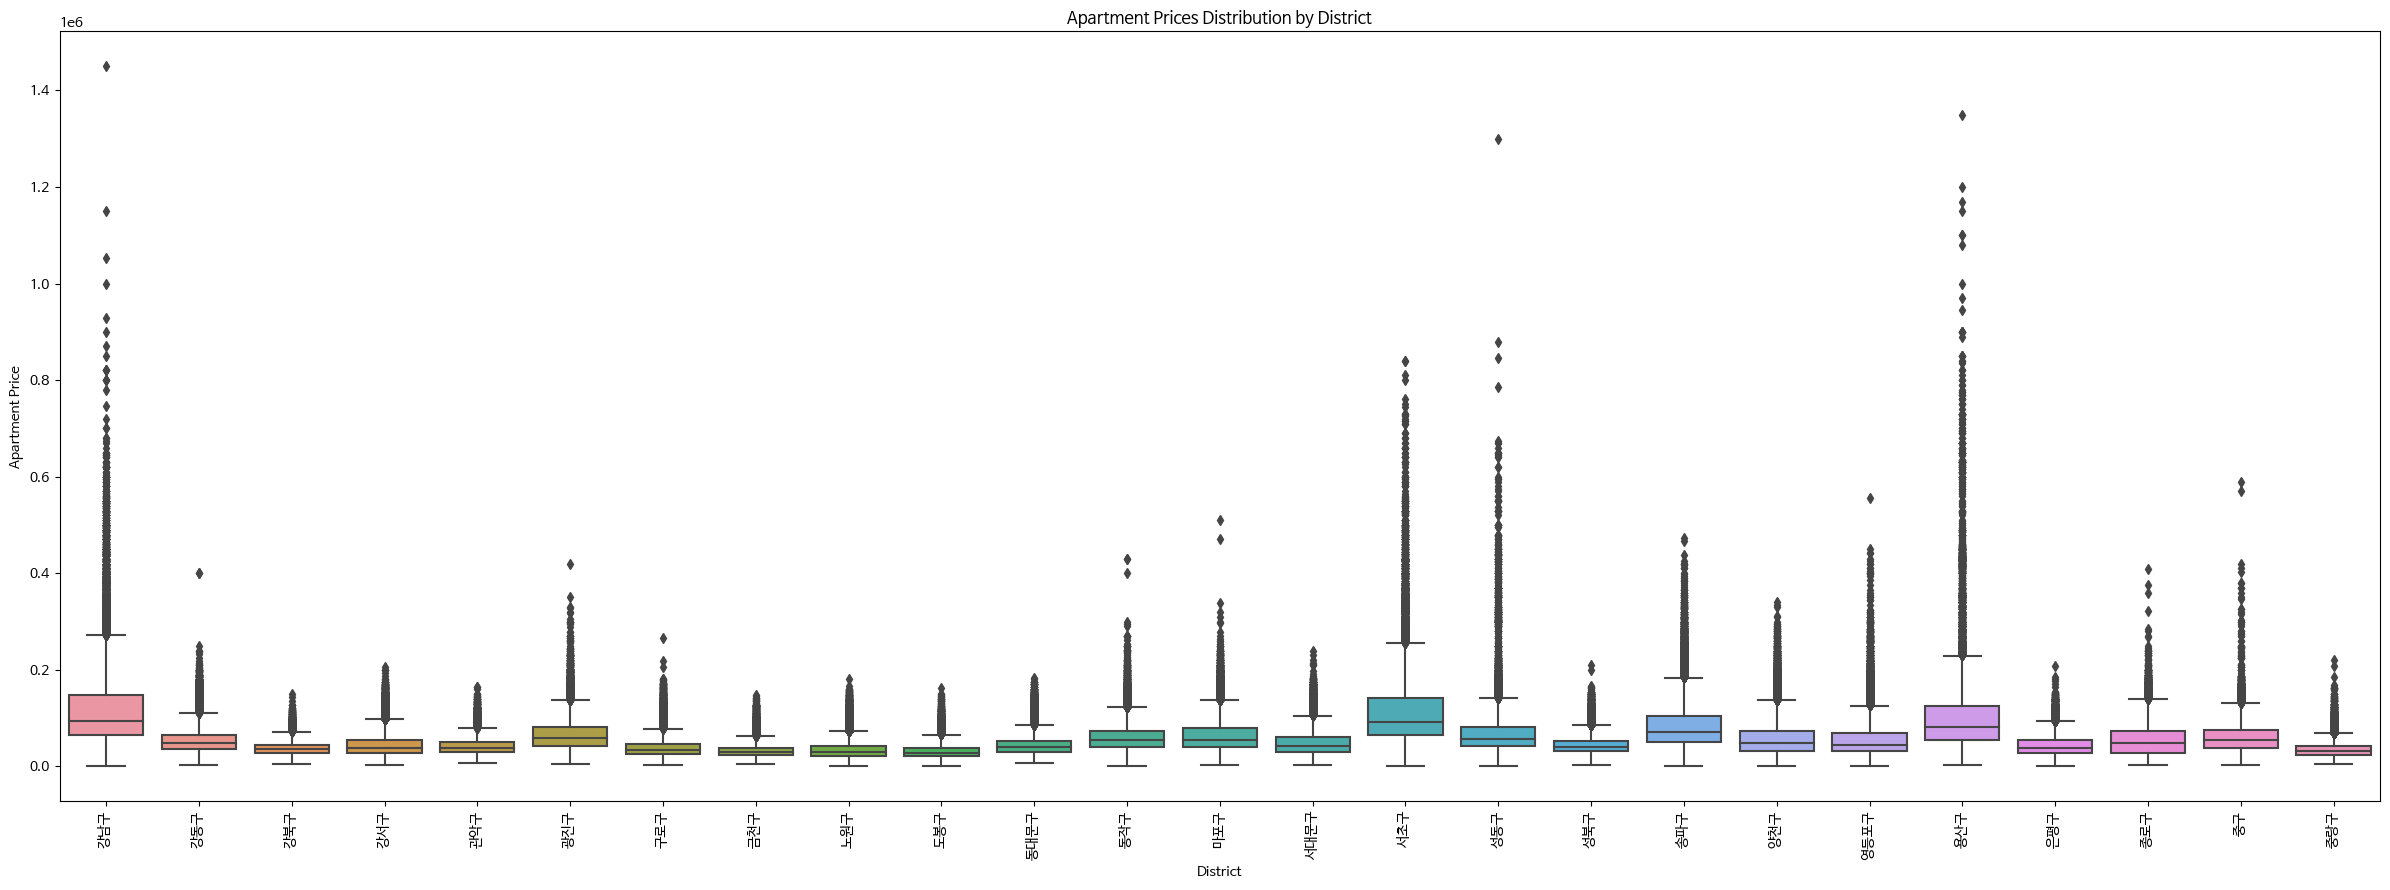

In [225]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=dt, x="Íµ¨", y="target")

plt.xticks(rotation=90)
plt.title('Apartment Prices Distribution by District')
plt.xlabel('District')
plt.ylabel('Apartment Price')

plt.tight_layout()
plt.show()

In [226]:
dt['Í≥ÑÏïΩÎÖÑÏõî']

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1118817    200707
1118818    200708
1118819    200708
1118820    200709
1118821    200701
Name: Í≥ÑÏïΩÎÖÑÏõî, Length: 1118822, dtype: int64

In [227]:
dt['Í≥ÑÏïΩÎÖÑ'] = dt['Í≥ÑÏïΩÎÖÑÏõî'].map(lambda x : x // 100)

In [228]:
dt["Í≥ÑÏïΩÎÖÑ"].nunique()

17

In [229]:
dt["Í≥ÑÏïΩÎÖÑ"].max()

2023

In [230]:
dt["Í≥ÑÏïΩÎÖÑ"].min()

2007

## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [231]:
dt.shape

(1118822, 37)

In [232]:
dt.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY',
       'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_public', 'Íµ¨', 'Í≥ÑÏïΩÎÖÑ'],
      dtype='object')

In [233]:
dt_test = pd.read_csv(test_path)

In [234]:
dt_test = dt_test.drop(columns=cols_to_drop)

In [235]:
dt_test.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY',
       'Îã®ÏßÄÏã†Ï≤≠Ïùº'],
      dtype='object')

In [236]:
dt_test.shape

(9272, 33)

In [237]:
dt_test['is_public'] = dt_test["k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)"].notnull()

In [238]:
dt_test['Íµ¨'] = dt_test['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])

In [239]:
dt_test['Í≥ÑÏïΩÎÖÑ'] = dt_test['Í≥ÑÏïΩÎÖÑÏõî'].map(lambda x : x // 100)

In [240]:
dt_test.shape

(9272, 36)

In [241]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1118822 non-null  object 
 1   Î≤àÏßÄ                      1118597 non-null  object 
 2   Î≥∏Î≤à                      1118747 non-null  float64
 3   Î∂ÄÎ≤à                      1118747 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1116696 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1118822 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1118822 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1118822 non-null  int64  
 8   Ï∏µ                       1118822 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1118822 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1118822 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 5983 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [242]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ÏãúÍµ∞Íµ¨                     9272 non-null   object 
 1   Î≤àÏßÄ                      9270 non-null   object 
 2   Î≥∏Î≤à                      9272 non-null   float64
 3   Î∂ÄÎ≤à                      9272 non-null   float64
 4   ÏïÑÌååÌä∏Î™Ö                    9262 non-null   object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 9272 non-null   float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    9272 non-null   int64  
 7   Í≥ÑÏïΩÏùº                     9272 non-null   int64  
 8   Ï∏µ                       9272 non-null   int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    9272 non-null   int64  
 10  ÎèÑÎ°úÎ™Ö                     9272 non-null   object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 212 non-null    float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  9272 non-null   object 
 13  Í

In [243]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [244]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

########### Ïó¨Í∏∞ÏÑú Ïä§ÌÉëÌï®.....

In [104]:
# from urllib.request import urlopen
# from urllib import parse
# from urllib.request import Request
# from urllib.error import HTTPError
# from bs4 import BeautifulSoup
# import json


# client_id ='5c6bx53l07'
# client_secret = 'ZHOUOfmLgXtX5gMd7EUalFn5gAhemNjCRxrE15VP'

# api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

# geo_coordi = []
# for add in dt['street'].unique():
#     add_urlenc = parse.quote(add)
#     url = api_url + add_urlenc
#     request = Request(url)
#     request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
#     request.add_header('X-NCP-APIGW-API-KEY', client_secret)

#     try:
#         response = urlopen(request)
#         rescode = response.getcode()
#         if rescode == 200:
#             response_body = response.read().decode('utf-8')
#             response_body = json.loads(response_body)
#             if 'addresses' in response_body:
#                 latitude = response_body['addresses'][0]['y']
#                 longitude = response_body['addresses'][0]['x']
#                 print('success!')

#             else: 
#                 print('result does not exist in this address : ',add)
#                 latitude = None
#                 longitude = None

#         else:
#             print('response error code : %d' %rescode)
#             latitude = None
#             longitude = None
#     except HTTPError as e:
#         print("HTTP error!")
#         latitude = None
#         longitude = None
#     except Exception as e:
#         print("An error occurred:", e)
#         latitude = None
#         longitude = None


#     geo_coordi.append([latitude,longitude])

# np_geo_coordi = np.array(geo_coordi)
# pd_geo_coordi = pd.DataFrame({'street' : dt['street'].unique(),
#                              'latitude': np_geo_coordi[:,0],
#                             'longitude': np_geo_coordi[:,1]})
    
# pd_geo_coordi.to_csv('Ï¢åÌëú.csv')


success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
An error occurred: list index out of range
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
success!
suc

In [245]:
coords = pd.read_csv('/data/ephemeral/home/upstage-ml-regression-3/eonseon/coords.csv')

# Ï¢åÌëú CSV ÌååÏùºÏóêÏÑú 'street'ÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
coords.set_index('street', inplace=True)

# dt Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú null Í∞íÏùÑ Ï¢åÌëú CSV ÌååÏùºÏùò Í∞íÏúºÎ°ú ÎåÄÏ≤¥
for index, row in dt.iterrows():
    if pd.isnull(row['Ï¢åÌëúX']) or pd.isnull(row['Ï¢åÌëúY']):
        street = row['ÎèÑÎ°úÎ™Ö']
        if street in coords.index:
            dt.at[index, 'Ï¢åÌëúX'] = coords.loc[street, 'Ï¢åÌëúX']
            dt.at[index, 'Ï¢åÌëúY'] = coords.loc[street, 'Ï¢åÌëúY']

In [86]:
#### geocode ÌïòÍ≥† x y Ï¢åÌëú ÎÇ†Î¶¨Í≥† Ïã∂Îã§ÏïÑÏïÑÏïÑÏïÑÏïÑ„Öè„Öè„Öè„Öè„Öè„Öè„Öè„Öè

In [246]:
from math import radians, cos, sin, sqrt, atan2
from scipy.spatial import cKDTree
# Vincenty Í≥µÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îëê Ï†ê Í∞ÑÏùò Í±∞Î¶¨Î•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
def calculate_distance(lat1, lon1, lat2, lon2):
    # ÏßÄÍµ¨Ïùò Î∞òÍ≤Ω (Îã®ÏúÑ: m)
    R = 6371e3
    
    # ÏúÑÎèÑ Î∞è Í≤ΩÎèÑÎ•º ÎùºÎîîÏïàÏúºÎ°ú Î≥ÄÌôò
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    # Îëê Ï†ê Í∞ÑÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞
    delta_lon = lon2_rad - lon1_rad
    
    # Vincenty Í≥µÏãù Í≥ÑÏÇ∞
    a = sin((lat2_rad - lat1_rad) / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(delta_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance
def nearest_metro_station_distance(dt_row, kdtree, df_metro):
    dt_coords = (dt_row['Ï¢åÌëúY'], dt_row['Ï¢åÌëúX'])
    if np.isnan(dt_coords[0]) or np.isnan(dt_coords[1]):  # Ï¢åÌëúÍ∞íÏù¥ nullÏù∏ Í≤ΩÏö∞
        return np.nan  # NaNÏúºÎ°ú Î∞òÌôòÌïòÏó¨ Ìï¥Îãπ ÏúÑÏπòÏóê ÎåÄÌïú Í±∞Î¶¨Î•º ÏóÜÏùåÏúºÎ°ú ÌëúÏãú
    else:
        nearest_idx = kdtree.query(dt_coords)[1]
        nearest_coords = (df_metro.loc[nearest_idx, 'ÏúÑÎèÑ'], df_metro.loc[nearest_idx, 'Í≤ΩÎèÑ'])
        distance = calculate_distance(dt_coords[1], dt_coords[0], nearest_coords[1], nearest_coords[0])
        return distance

# ÏßÄÌïòÏ≤† Ïó≠ÏÑ∏Í∂å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÌåêÎ≥ÑÌïòÎäî Ïó¥ Ï∂îÍ∞ÄÌïòÎäî Ìï®Ïàò
def add_metro_station_proximity_column(dt, df_metro, proximity_threshold):
    # ÏßÄÌïòÏ≤† Ïó≠ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï¢åÌëúÎ•º Ï∂îÏ∂úÌïòÏó¨ KD Ìä∏Î¶¨ Ïù∏Îç±Ïä§ ÏÉùÏÑ±
    metro_station_coords = df_metro[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].dropna().values  # null Í∞íÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï¢åÌëú Ï∂îÏ∂ú
    kdtree_metro_station = cKDTree(metro_station_coords)
    
    # dt Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÌåêÎ≥ÑÌïòÎäî Ïó¥ Ï∂îÍ∞Ä
    dt['Í∞ÄÏû•Í∞ÄÍπåÏö¥_ÏßÄÌïòÏ≤†Ïó≠_Í±∞Î¶¨'] = dt.apply(nearest_metro_station_distance, args=(kdtree_metro_station, df_metro,), axis=1)
    
    # ÏµúÍ∑ºÏ†ë ÏßÄÌïòÏ≤† Ïó≠Í≥ºÏùò Í±∞Î¶¨Í∞Ä Í∏∞Ï§Ä Í±∞Î¶¨ Ïù¥ÎÇ¥Ïù∏ÏßÄ ÌåêÎ≥ÑÌïòÏó¨ Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïó¥ Ï∂îÍ∞Ä
    dt['ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å'] = dt['Í∞ÄÏû•Í∞ÄÍπåÏö¥_ÏßÄÌïòÏ≤†Ïó≠_Í±∞Î¶¨'] <= proximity_threshold

# ÏßÄÌïòÏ≤† Ïó≠ÏÑ∏Í∂åÏùÑ ÌåêÎ≥ÑÌïòÍ∏∞ ÏúÑÌïú ÏßÄÌïòÏ≤† Ïó≠Í≥ºÏùò ÏµúÎåÄ Í±∞Î¶¨ ÏÑ§Ï†ï (Ïòà: 115m)
proximity_threshold_metro_station = 500

# Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïó¥ Ï∂îÍ∞Ä
add_metro_station_proximity_column(concat, df_metro, proximity_threshold_metro_station)

In [247]:
concat['Í∞ÄÏû•Í∞ÄÍπåÏö¥_ÏßÄÌïòÏ≤†Ïó≠_Í±∞Î¶¨'].describe()

count    251862.000000
mean        518.320398
std         333.158247
min          40.104097
25%         281.029330
50%         449.758336
75%         630.302913
max        2145.473301
Name: Í∞ÄÏû•Í∞ÄÍπåÏö¥_ÏßÄÌïòÏ≤†Ïó≠_Í±∞Î¶¨, dtype: float64

In [248]:
concat['ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å'].value_counts()

False    977344
True     150750
Name: ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å, dtype: int64

In [249]:
from math import radians, cos, sin, sqrt, atan2
from scipy.spatial import cKDTree
# Vincenty Í≥µÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îëê Ï†ê Í∞ÑÏùò Í±∞Î¶¨Î•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
def calculate_distance(lat1, lon1, lat2, lon2):
    # ÏßÄÍµ¨Ïùò Î∞òÍ≤Ω (Îã®ÏúÑ: m)
    R = 6371e3
    
    # ÏúÑÎèÑ Î∞è Í≤ΩÎèÑÎ•º ÎùºÎîîÏïàÏúºÎ°ú Î≥ÄÌôò
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    # Îëê Ï†ê Í∞ÑÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞
    delta_lon = lon2_rad - lon1_rad
    
    # Vincenty Í≥µÏãù Í≥ÑÏÇ∞
    a = sin((lat2_rad - lat1_rad) / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(delta_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance

# ÏµúÍ∑ºÏ†ë Î≤ÑÏä§ Ï†ïÎ•òÏû•Í≥ºÏùò Í±∞Î¶¨ Í≥ÑÏÇ∞ Ìï®Ïàò
def nearest_bus_stop_distance(dt_row, kdtree, df_bus):
    dt_coords = (dt_row['Ï¢åÌëúY'], dt_row['Ï¢åÌëúX'])
    if np.isnan(dt_coords[0]) or np.isnan(dt_coords[1]):  # Ï¢åÌëúÍ∞íÏù¥ nullÏù∏ Í≤ΩÏö∞
        return np.nan  # NaNÏúºÎ°ú Î∞òÌôòÌïòÏó¨ Ìï¥Îãπ ÏúÑÏπòÏóê ÎåÄÌïú Í±∞Î¶¨Î•º ÏóÜÏùåÏúºÎ°ú ÌëúÏãú
    else:
        nearest_idx = kdtree.query(dt_coords)[1]
        nearest_coords = (df_bus.loc[nearest_idx, 'YÏ¢åÌëú'], df_bus.loc[nearest_idx, 'XÏ¢åÌëú'])
        distance = calculate_distance(dt_coords[1], dt_coords[0], nearest_coords[1], nearest_coords[0])
        return distance

# Î≤ÑÏä§ Ï†ïÎ•òÏû• ÏÑ∏Í∂å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÌåêÎ≥ÑÌïòÎäî Ïó¥ Ï∂îÍ∞ÄÌïòÎäî Ìï®Ïàò
def add_bus_stop_proximity_column(dt, df_bus, proximity_threshold):
    # Î≤ÑÏä§ Ï†ïÎ•òÏû• Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï¢åÌëúÎ•º Ï∂îÏ∂úÌïòÏó¨ KD Ìä∏Î¶¨ Ïù∏Îç±Ïä§ ÏÉùÏÑ±
    bus_stop_coords = df_bus[['YÏ¢åÌëú', 'XÏ¢åÌëú']].dropna().values  # null Í∞íÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï¢åÌëú Ï∂îÏ∂ú
    kdtree_bus_stop = cKDTree(bus_stop_coords)
    
    # dt Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÌåêÎ≥ÑÌïòÎäî Ïó¥ Ï∂îÍ∞Ä
    dt['Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨'] = dt.apply(nearest_bus_stop_distance, args=(kdtree_bus_stop, df_bus,), axis=1)
    
    # ÏµúÍ∑ºÏ†ë Î≤ÑÏä§ Ï†ïÎ•òÏû•Í≥ºÏùò Í±∞Î¶¨Í∞Ä Í∏∞Ï§Ä Í±∞Î¶¨ Ïù¥ÎÇ¥Ïù∏ÏßÄ ÌåêÎ≥ÑÌïòÏó¨ Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïó¥ Ï∂îÍ∞Ä
    dt['Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å'] = dt['Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨'] <= proximity_threshold

# Î≤ÑÏä§ Ï†ïÎ•òÏû• ÏÑ∏Í∂åÏùÑ ÌåêÎ≥ÑÌïòÍ∏∞ ÏúÑÌïú Î≤ÑÏä§ Ï†ïÎ•òÏû•Í≥ºÏùò ÏµúÎåÄ Í±∞Î¶¨ ÏÑ§Ï†ï (Ïòà: 115m)
proximity_threshold_bus_stop = 100

# Ïó≠ÏÑ∏Í∂å Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïó¥ Ï∂îÍ∞Ä
add_bus_stop_proximity_column(concat, df_bus, proximity_threshold_bus_stop)

In [250]:
concat['Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨'].describe()

count    251862.000000
mean        112.969804
std          56.968541
min           5.622265
25%          75.210878
50%         102.638576
75%         139.221212
max         424.025697
Name: Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨, dtype: float64

In [251]:
concat['Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å'].value_counts()

False    1008707
True      119387
Name: Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å, dtype: int64

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


In [252]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [253]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2136
Ï†ÑÏö©Î©¥Ï†Å(„é°)                         0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                    1111271
Í±∞ÎûòÏú†Ìòï                      1086451
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                    1090013
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                   876170
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)         876170
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)     876170
k-85„é°~135„é°Ïù¥Ìïò               876170
k-ÏàòÏ†ïÏùºÏûê                     876170
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏                   920757
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                    877561
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï        

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [254]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [255]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                            0
Î≤àÏßÄ                           227
Î≥∏Î≤à                            75
Î∂ÄÎ≤à                            75
ÏïÑÌååÌä∏Î™Ö                        2136
Ï†ÑÏö©Î©¥Ï†Å(„é°)                        0
Í≥ÑÏïΩÎÖÑÏõî                           0
Í≥ÑÏïΩÏùº                            0
Ï∏µ                              0
Í±¥Ï∂ïÎÖÑÎèÑ                           0
ÎèÑÎ°úÎ™Ö                            0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  876170
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        876170
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    876170
k-85„é°~135„é°Ïù¥Ìïò              876170
k-ÏàòÏ†ïÏùºÏûê                    876170
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏                  920757
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                   877561
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                  885389
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                   877751
Í±¥Ï∂ïÎ©¥Ï†Å                      876279
Ï£ºÏ∞®ÎåÄÏàò                      876277
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4       876125
Îã®Ïß

In [256]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 38 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                251924 non-null   float64
 12  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù

In [257]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [258]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [259]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [260]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

ÏãúÍµ∞Íµ¨                       0
Î≤àÏßÄ                        0
Î≥∏Î≤à                        0
Î∂ÄÎ≤à                        0
ÏïÑÌååÌä∏Î™Ö                      0
Ï†ÑÏö©Î©¥Ï†Å(„é°)                   0
Í≥ÑÏïΩÎÖÑÏõî                      0
Í≥ÑÏïΩÏùº                       0
Ï∏µ                         0
Í±¥Ï∂ïÎÖÑÎèÑ                      0
ÎèÑÎ°úÎ™Ö                       0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0
k-85„é°~135„é°Ïù¥Ìïò              0
k-ÏàòÏ†ïÏùºÏûê                    0
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏                  0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                   0
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                  0
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                   0
Í±¥Ï∂ïÎ©¥Ï†Å                      0
Ï£ºÏ∞®ÎåÄÏàò                      0
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4       0
Îã®ÏßÄÏäπÏù∏Ïùº                     0
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                    0
Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú                   0
Ï¢

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

In [261]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 38)


In [169]:
# # Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
# def remove_outliers_iqr(dt, column_name):
#     df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
#     df_test = dt.query('is_test == 1')

#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

#     result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
#     return result

In [98]:
# # ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
# concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å(„é°)')

In [99]:
# # Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
# print(concat_select.shape)

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [262]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [263]:
district_order = dt.groupby("Íµ¨")["target"].mean().sort_values(ascending=False).index.tolist()

In [264]:
# Create a dictionary to map district names to their corresponding label encoded values
district_mapping = {district: label for label, district in enumerate(district_order)}

In [265]:
concat_select['Íµ¨_encoded'] = concat_select["Íµ¨"].map(district_mapping)

In [266]:
concat_select

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à      ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ        ÎèÑÎ°úÎ™Ö  \
0     658-1  658.0  1.0    Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97    8   3  1987      Ïñ∏Ï£ºÎ°ú 3   
1     658-1  658.0  1.0    Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97   22   4  1987      Ïñ∏Ï£ºÎ°ú 3   
2     658-1  658.0  1.0    Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    54.98   28   5  1987      Ïñ∏Ï£ºÎ°ú 3   
3     658-1  658.0  1.0    Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97    3   4  1987      Ïñ∏Ï£ºÎ°ú 3   
4     658-1  658.0  1.0    Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97    8   2  1987      Ïñ∏Ï£ºÎ°ú 3   
...     ...    ...  ...       ...      ...  ...  ..   ...        ...   
9267    816  816.0  0.0  Ïã†ÎÇ¥Ïö∞ÎîîÏïà1Îã®ÏßÄ    84.65   19  13  2014  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85   
9268    816  816.0  0.0  Ïã†ÎÇ¥Ïö∞ÎîîÏïà1Îã®ÏßÄ    84.62   25  12  2014  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85   
9269    816  816.0  0.0  Ïã†ÎÇ¥Ïö∞ÎîîÏïà1Îã®ÏßÄ   101.65   27  12  2014  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85   
9270    816  816.0  0.0  Ïã†ÎÇ¥Ïö∞ÎîîÏïà1Îã®ÏßÄ    84.94    2  18  2014  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85   
9271    816  816.0  0.0  Ïã†ÎÇ¥Ïö∞ÎîîÏïà1Îã®ÏßÄ    84.65    4  13  2014  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85   

      k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  ...    Íµ¨   Í≥ÑÏïΩÎÖÑ  is_test Í∞ÄÏû•Í∞ÄÍπåÏö¥_ÏßÄÌïòÏ≤†Ïó≠_Í±∞Î¶¨ ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨  \
0      20204.0  ...  Í∞ïÎÇ®Íµ¨  2017        0    699.547185  False      73.917793   
1      20204.0  ...  Í∞ïÎÇ®Íµ¨  2017        0    699.547185  False      73.917793   
2      20204.0  ...  Í∞ïÎÇ®Íµ¨  2017        0    699.547185  False      73.917793   
3      20204.0  ...  Í∞ïÎÇ®Íµ¨  2018        0    699.547185  False      73.917793   
4      20204.0  ...  Í∞ïÎÇ®Íµ¨  2018        0    699.547185  False      73.917793   
...        ...  ...  ...   ...      ...           ...    ...            ...   
9267   93849.0  ...  Ï§ëÎûëÍµ¨  2023        1    559.189858  False      49.828552   
9268   93849.0  ...  Ï§ëÎûëÍµ¨  2023        1    559.189858  False      49.828552   
9269   93849.0  ...  Ï§ëÎûëÍµ¨  2023        1    559.189858  False      49.828552   
9270   93849.0  ...  Ï§ëÎûëÍµ¨  2023        1    559.189858  False      49.828552   
9271   93849.0  ...  Ï§ëÎûëÍµ¨  2023        1    559.189858  False      49.828552   

     Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å    Îèô  Í≥ÑÏïΩÏõî  Íµ¨_encoded  
0       True  Í∞úÌè¨Îèô   12          0  
1       True  Í∞úÌè¨Îèô   12          0  
2       True  Í∞úÌè¨Îèô   12          0  
3       True  Í∞úÌè¨Îèô   01          0  
4       True  Í∞úÌè¨Îèô   01          0  
...      ...  ...  ...        ...  
9267    True  Ïã†ÎÇ¥Îèô   07         21  
9268    True  Ïã†ÎÇ¥Îèô   07         21  
9269    True  Ïã†ÎÇ¥Îèô   08         21  
9270    True  Ïã†ÎÇ¥Îèô   09         21  
9271    True  Ïã†ÎÇ¥Îèô   09         21  

[1128094 rows x 39 columns]

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [267]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.128094e+06
mean     1.998791e+03
std      9.358540e+00
min      1.961000e+03
10%      1.986000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.010000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [268]:
concat_select['yrs_diff_built_contract'] = concat_select['Í≥ÑÏïΩÎÖÑ'] - concat_select['Í±¥Ï∂ïÎÖÑÎèÑ']

In [269]:
concat_select['yrs_diff_built_contract']

0       30
1       30
2       30
3       31
4       31
        ..
9267     9
9268     9
9269     9
9270     9
9271     9
Name: yrs_diff_built_contract, Length: 1128094, dtype: int64

In [270]:
concat_select['built_in3yrs'] = concat_select['yrs_diff_built_contract'].apply(lambda x : 1 if x <= 3 else 0)

In [271]:
concat_select['built_in5yrs'] = concat_select['yrs_diff_built_contract'].apply(lambda x : 1 if x <= 5 else 0)

In [272]:
concat_select['built_over30yrs'] = concat_select['yrs_diff_built_contract'].apply(lambda x : 1 if x >= 30 else 0)

In [273]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  ...  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3   20204.0  ...   

   ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å  Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨  Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å    Îèô Í≥ÑÏïΩÏõî Íµ¨_encoded yrs_diff_built_contract  \
0   False       73.917793     True  Í∞úÌè¨Îèô  12         0                      30   

  built_in3yrs  built_in5yrs  built_over30yrs  
0            0             0                1  

[1 rows x 43 columns]

In [274]:
concat_select.columns = concat_select.columns.str.replace('[^\w\s]', '')
concat_select.columns = concat_select.columns.str.replace(' ', '_')

In [301]:
concat_select.shape

(1128094, 43)

## 5. Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [302]:
concat_select = concat_select.drop(columns={'Í∞ÄÏû•Í∞ÄÍπåÏö¥_ÏßÄÌïòÏ≤†Ïó≠_Í±∞Î¶¨','Í∞ÄÏû•Í∞ÄÍπåÏö¥_Î≤ÑÏä§Ï†ïÎ•òÏû•_Í±∞Î¶¨'})

In [303]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1118822, 40) (9272, 40)


In [304]:
dt_test.head(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö  kÏ£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  ...   Í≥ÑÏïΩÎÖÑ  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   26  5  1987  Ïñ∏Ï£ºÎ°ú 3  20204.0  ...  2023   

   ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å  Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å    Îèô Í≥ÑÏïΩÏõî Íµ¨_encoded yrs_diff_built_contract built_in3yrs  \
0   False     True  Í∞úÌè¨Îèô  07         0                      36            0   

   built_in5yrs  built_over30yrs  
0             0                1  

[1 rows x 40 columns]

In [305]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [306]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'kÏ£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'kÏ†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©60Ïù¥Ìïò', 'kÏ†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©6085Ïù¥Ìïò', 'k85135Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_public', 'Í≥ÑÏïΩÎÖÑ', 'ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å', 'Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å', 'Íµ¨_encoded', 'yrs_diff_built_contract', 'built_in3yrs', 'built_in5yrs', 'built_over30yrs']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'kÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄÏùòÎ¨¥ÏûÑÎåÄÏûÑÏùò1234', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ_ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÏõî']


In [307]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:04<00:00,  3.73it/s]


In [308]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  kÏ£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  ...   Í≥ÑÏïΩÎÖÑ  \
0  4732  1149   1   328  79.97    8  3  1987  6176  20204.0  ...  2017   

   ÏßÄÌïòÏ≤†Ïó≠ÏÑ∏Í∂å  Î≤ÑÏä§Ï†ïÎ•òÏû•ÏÑ∏Í∂å  Îèô  Í≥ÑÏïΩÏõî  Íµ¨_encoded  yrs_diff_built_contract  built_in3yrs  \
0   False     True  8   11          0                       30             0   

   built_in5yrs  built_over30yrs  
0             0                1  

[1 rows x 40 columns]

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [309]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [310]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

In [311]:
# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [312]:
# # RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
# model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
# model.fit(X_train, y_train)
# pred = model.predict(X_val)

In [313]:
import lightgbm as lgb

In [314]:
# Define parameters for LGBMRegressor
import xgboost as xgb

params = {
    # 'objective': 'regression',
    # 'metric': 'rmse',
    # 'max_depth' : 20,
    # 'num_leaves': 255,
    # 'min_child_samples' : 50,
    # 'learning_rate': 0.05,
    # 'n_estimators': 200,
    # 'random_state': 42
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'learning_rate': 0.05,
    'n_estimators': 500,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,         # L1 Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
    'reg_lambda': 0.1,        # L2 Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
    'gamma': 0.1,             # Î∂ÑÌï†ÏùÑ ÏúÑÌïú ÏµúÏÜå ÏÜêÏã§ Í∞êÏÜåÎ•º Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.
    'min_child_weight': 1,
    'random_state': 42
}

# Create and train the LGBMRegressor model
# model2 = lgb.LGBMRegressor(**params)
model2 = xgb.XGBRegressor(**params)
model2.fit(X_train, y_train)

# Make predictions on the validation set
pred2 = model2.predict(X_val)

In [315]:
# lgb.plot_importance(model2, max_num_features=300, importance_type='split', figsize=(15, 60))
# plt.show()

TypeError: booster must be Booster or LGBMModel.

<Figure size 1500x6000 with 0 Axes>

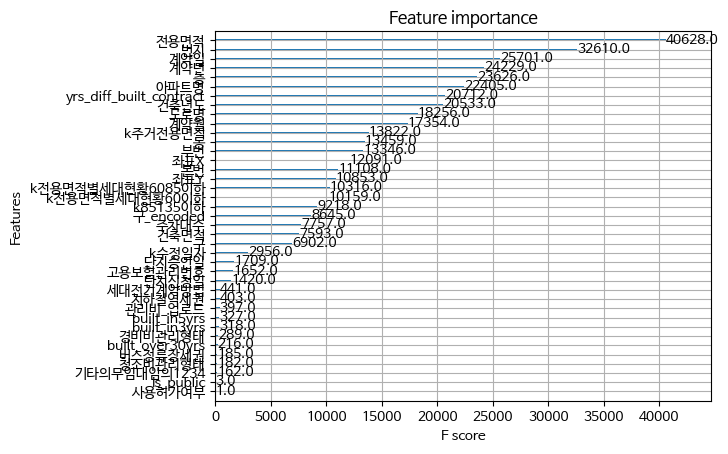

In [317]:
plt.figure(figsize=(15, 60))
xgb.plot_importance(model2, max_num_features=300, importance_type='weight')
plt.show()

- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [318]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred2))}')

RMSE test: 6689.986501385097


In [255]:
# # ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [256]:
# # ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
# importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
# importances = importances.sort_values(ascending=False)

# plt.figure(figsize=(10,8))
# plt.title("Feature Importances")
# sns.barplot(x=importances, y=importances.index)
# plt.show()

NameError: name 'model' is not defined

In [151]:
# # ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
# with open('saved_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [320]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [153]:
# # Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
# perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
#                              scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
#                              random_state = 42,
#                              n_iter=3).fit(X_val, y_val)
# eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

In [154]:
# # Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
# perm = PermutationImportance(model2,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
#                              scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
#                              random_state = 42,
#                              n_iter=3).fit(X_val, y_val)
# eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [321]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
# X_val['pred1'] = pred
X_val['pred2'] = pred2

In [158]:
# # Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
# def calculate_se(target, pred):
#     squared_errors = (target - pred) ** 2
#     return squared_errors

# # RMSE Í≥ÑÏÇ∞
# squared_errors = calculate_se(X_val['target'], X_val['pred1'])
# X_val['error1'] = squared_errors

# squared_errors = calculate_se(X_val['target'], X_val['pred2'])
# X_val['error2'] = squared_errors

In [159]:
# # ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
# X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [160]:
# X_val_sort.head()

Î≤àÏßÄ    Î≥∏Î≤à   Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö      Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö        kÏ£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
445597  5962  1383    0  4020  203.1210    9  30  2004  6473   35874.614831   
224463  5101  1227  268  1972  243.5200   28   2  2003  6324  152563.000000   
224567   745   222    0   112  273.9600   28  16  2020  5895  152563.000000   
221949  5833  1338    0   808  206.8953   28   6  2019  8779   62442.397642   
223974  2465   719  299  4567  131.0534    5   5  2003  5003   39121.170678   

        ...  built_in3yrs  built_in5yrs  built_over30yrs     target  \
445597  ...             0             0                0  1053000.0   
224463  ...             0             0                0    72000.0   
224567  ...             1             1                0  1450000.0   
221949  ...             0             1                0   900000.0   
223974  ...             0             0                0   210000.0   

                 pred      pred1          pred2         error        error1  \
445597  375520.797005   299600.0  375520.797005  5.676116e+11  5.676116e+11   
224463  391139.850706   523800.0  391139.850706  2.041232e+11  2.041232e+11   
224567  866710.254651  1057442.0  866710.254651  1.541018e+11  1.541018e+11   
221949  634138.148395   536800.0  634138.148395  1.319142e+11  1.319142e+11   
223974  245917.958166   519400.0  245917.958166  9.572836e+10  9.572836e+10   

              error2  
445597  4.589781e+11  
224463  1.018502e+11  
224567  3.402269e+11  
221949  7.068252e+10  
223974  1.290100e+09  

[5 rows x 44 columns]

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [161]:
# X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
# X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [162]:
# # Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
# error_top100 = X_val_sort_top100.copy()
# for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
#     error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

# best_top100 = X_val_sort_tail100.copy()
# for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
#     best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [163]:
# display(error_top100.head(1))
# display(best_top100.head(1))

Î≤àÏßÄ    Î≥∏Î≤à   Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö     Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ       ÎèÑÎ°úÎ™Ö       kÏ£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
445597  87  87.0  0.0  ÏïÑÏù¥ÌååÌÅ¨  203.121    9  30  2004  ÏòÅÎèôÎåÄÎ°ú 640  35874.614831   

        ...  built_in3yrs  built_in5yrs  built_over30yrs     target  \
445597  ...             0             0                0  1053000.0   

                 pred     pred1          pred2         error        error1  \
445597  375520.797005  299600.0  375520.797005  5.676116e+11  5.676116e+11   

              error2  
445597  4.589781e+11  

[1 rows x 44 columns]

Î≤àÏßÄ   Î≥∏Î≤à    Î∂ÄÎ≤à   ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö       kÏ£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
322696  6-63  6.0  63.0  Î£®Ï≤¥ÎπÑÏä§ÌÉÄ  29.98    2  13  2020  Í≥†Ï≤ôÎ°ú 5  40255.362376   

        ...  built_in3yrs  built_in5yrs  built_over30yrs   target  \
322696  ...             1             1                0  31700.0   

                pred    pred1         pred2 error  error1        error2  
322696  26466.642148  31700.0  26466.642148   0.0     0.0  2.738803e+07  

[1 rows x 44 columns]

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

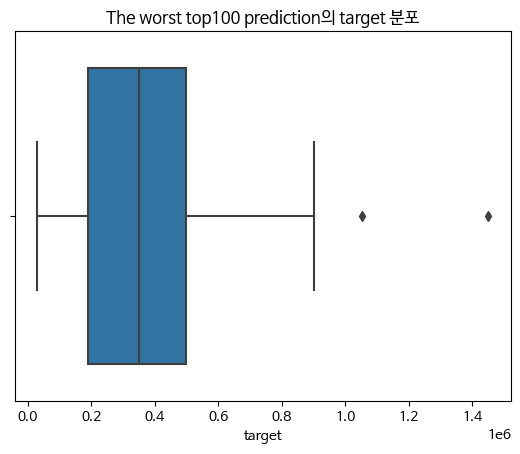

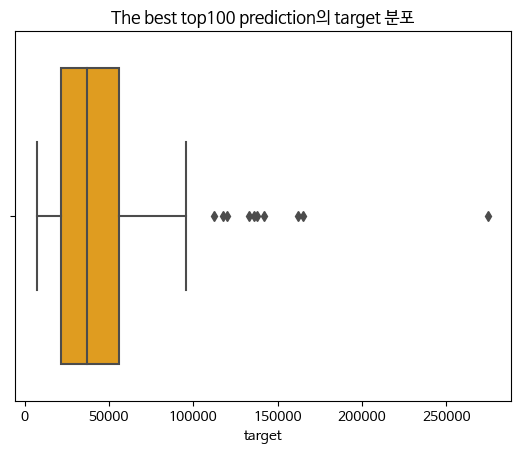

In [164]:
# sns.boxplot(data = error_top100, x='target')
# plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
# plt.show()

# sns.boxplot(data = best_top100, x='target', color='orange')
# plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
# plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

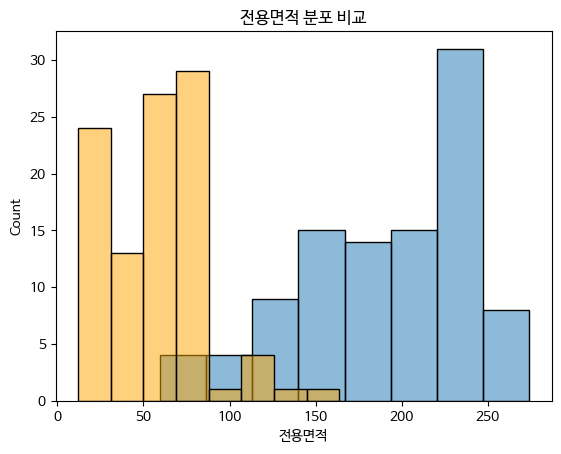

In [165]:
# sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
# sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
# plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
# plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [322]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('model2.pkl', 'rb') as f:
    model = pickle.load(f)

In [323]:
%%time
X_test = dt_test.drop(['target'], axis=1)
X_test.columns = X_test.columns.str.replace('[^\w\s]', '')
X_test.columns = X_test.columns.str.replace(' ', '_')

CPU times: user 2.71 ms, sys: 0 ns, total: 2.71 ms
Wall time: 2.69 ms


In [324]:
# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

In [325]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([198834.73 , 272394.56 , 349052.6  , ...,  94719.82 ,  76426.48 ,
        76498.016], dtype=float32)

In [171]:
# # Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
# with open('saved_model.pkl', 'rb') as f:
#     model = pickle.load(f)

In [172]:
# %%time
# X_test = dt_test.drop(['target'], axis=1)
# X_test.columns = X_test.columns.str.replace('[^\w\s]', '')
# X_test.columns = X_test.columns.str.replace(' ', '_')

CPU times: user 2.23 ms, sys: 19 ¬µs, total: 2.25 ms
Wall time: 2.23 ms


In [173]:
# # Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
# real_test_pred = model.predict(X_test)

In [174]:
# real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([213800., 358700., 351000., ..., 100900.,  74340.,  73390.])

## 7. Output File Save

In [326]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output_with_metro_bus_xgboost.csv', index=False)